# **k-Nearest Neighbors for Fake Bill Detection**

## **Introduction**

The k-Nearest Neighbors (k-NN) algorithm is a simple yet effective machine learning method utilized for classification and regression tasks. In the financial sector, it can be particularly beneficial in identifying counterfeit bills by comparing them with known examples. This method of instance-based learning doesn't necessitate the fitting of a model; rather, it classifies new instances based on a similarity measure (e.g., distance functions).

### k-NN Algorithm

The k-Nearest Neighbors algorithm can be summarized as follows:

1. **Initialization:** Starts with a dataset containing labeled examples (real or fake bills) and a new, unlabeled bill that needs classification.

2. **Distance Calculation:** Computes the distance between the new bill and every bill in the dataset using a distance metric, such as Euclidean distance, to determine similarity.

3. **Neighbor Selection:**  Identifies the 'k' nearest bills to the new bill based on these distances.

4. **Outcome Prediction:**
    - For classification tasks, k-NN assigns a label (real or fake) to the new bill based on the predominant label among its 'k' nearest neighbors.
    
    - For regression tasks, it could estimate a value by averaging the values associated with the 'k' nearest neighbors (though this is more relevant for other types of data).

## **Advantages and Disadvantages**

### Advantages

1. **Simplicity**: The straightforward nature of k-NN makes it easy to understand and implement.

2. **No Training Requirement**: As a lazy learner, k-NN is suitable for situations where the data changes frequently, as it doesn't require a distinct training phase.

3. **Versatility**: Capable of handling different types of data for classification, regression, and anomaly detection.

4. **Adaptability**: The algorithm can adjust to different data distributions and capture non-linear relationships.

### Disadvantages

1. **Computational Demand**: Calculating distances to all points in the dataset for each prediction makes k-NN computationally demanding, especially with large datasets.

2. **Sensitivity to k**: The choice of 'k' significantly impacts performance, requiring careful selection.

3. **Feature Scaling Necessity**: The reliance on distance calculations necessitates proper scaling of features to prevent distortion.

4. **Curse of Dimensionality**: The effectiveness of k-NN can diminish in high-dimensional spaces due to sparse data distribution and increased computation.

## **Dataset Overview**

We shift our focus from theoretical applications to a practical dataset, the "Fake Bills" dataset. This dataset comprises features such as diagonal, height (left and right sides), margin (upper and lower), and length, which are vital for distinguishing between real and counterfeit bills.

### Dataset Characteristics
1. **Dimensionality:** The dataset consists of 7 features, providing a comprehensive framework to evaluate bill authenticity.

2. **Relevance:** The selected features are directly related to physical measurements of bills, making them relevant for detecting counterfeits.

3. **Real-World Application:** With a direct link to financial security, this dataset bridges the gap between data science and practical applications, aiding in the fight against counterfeit currency.

4. **Analytical Potential:** The dataset's diverse features facilitate not only classification tasks for detecting fake bills but also offer opportunities for deeper analysis and understanding of counterfeit patterns.

### Implementing K-Nearest Neighbors (KNN) with the Dataset

In contrast to addressing abstract problems, we utilize KNN to discern the authenticity of bills, showcasing the algorithm's versatility and its critical application in enhancing financial security.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Correctly loading the CSV file with semicolon as the separator
df = pd.read_csv('fake_bills.csv', sep=';')

# Prepare the dataset
X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values
y = df['is_genuine'].astype(int).values

# Handle missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Preprocess the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Implement k-Nearest Neighbors
k = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn.fit(X_train, y_train)

# Test the model on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model performance
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       161
           1       0.98      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450

Confusion matrix:
 [[155   6]
 [  0 289]]
Accuracy score: 0.9866666666666667


#### Accuracy

The accuracy score is approximately 98.7%, which means that the model correctly identified about 98.7% of the bills (both genuine and fake) in the test set. This is a high accuracy rate and suggests that the model is highly effective for this particular task.

#### Precision, Recall, and F1-Score

1. Precision for class 0 (genuine bills) is 100%, indicating that every bill predicted as genuine was actually genuine. For class 1 (fake bills), precision is slightly lower at 98%, meaning there were a few instances where genuine bills were incorrectly labeled as fake.

2. Recall for class 0 is 96%, which means the model missed about 4% of the genuine bills, labeling them as fake. For class 1, recall is 100%, indicating that all fake bills were correctly identified.

3. The F1-score, which is a harmonic mean of precision and recall, is 0.98 for class 0 and 0.99 for class 1. These high F1-scores reflect the balanced performance between precision and recall for both classes.

#### Confusion Matrix

The confusion matrix provides a more detailed view:

1. 155 genuine bills were correctly classified (True Positives for class 0).
2. 6 genuine bills were incorrectly classified as fake (False Positives for class 0).
3. 289 fake bills were correctly identified (True Positives for class 1).
4. There were no instances where fake bills were incorrectly classified as genuine (False Negatives for class 1).

#### Analysis

- The model is highly effective at identifying both genuine and fake bills, with particularly strong performance in identifying fake bills (class 1). The recall of 100% for fake bills means the model is exceptionally reliable in scenarios where missing a fake bill could have serious consequences.

- The slight imbalance between precision for class 0 and class 1 (100% vs. 98%) is not very concerning given the high overall accuracy and recall rates. However, it does indicate a small room for improvement, perhaps by further tuning the model or preprocessing the data differently.

- The presence of 6 false positives (genuine bills classified as fake) suggests that while the model is conservative about identifying genuine bills, it errs on the side of caution. This is generally preferable in fraud detection systems, where false negatives (failing to catch a fake bill) are more problematic than false positives.

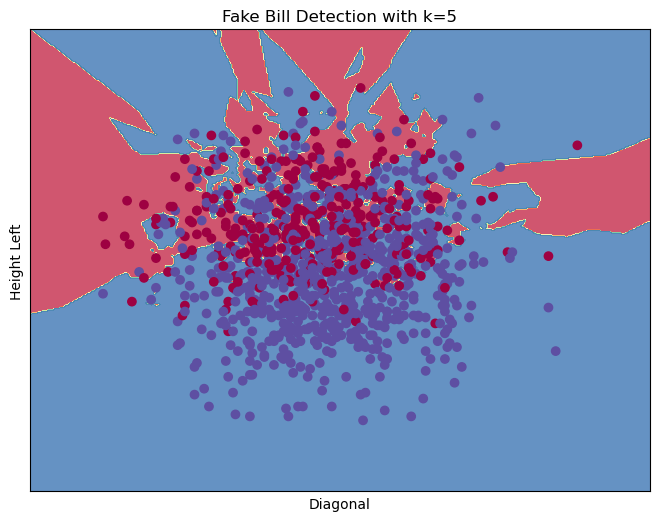

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Loading the dataset with the correct delimiter
df = pd.read_csv('fake_bills.csv', sep=';')

# Preparing the dataset
# For visualization, we'll only use 'diagonal' and 'height_left'
X = df[['diagonal', 'height_left']].values
y = df['is_genuine'].astype(int).values

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Preprocessing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Implementing k-Nearest Neighbors
k = 5  # Choosing the number of neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=k)

# Training the model on the training data
knn.fit(X_train, y_train)

# Visualization of the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Plotting the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('Diagonal')
plt.ylabel('Height Left')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(f'Fake Bill Detection with k={k}')
plt.show()


1. **Decision Boundary Complexity:** The decision boundaries between the classes appear to be highly irregular and complex. This complexity might suggest that the relationship between 'diagonal' and 'height_left' features and the class distinction (genuine versus fake) is not linear and possibly contains nuances that are being captured by the KNN algorithm due to its non-parametric nature.

2. **Data Distribution:** The scatter points representing the training data seem to be densely packed in certain regions, indicating clusters of similar bills. The distribution of points indicates variability in the bills' features, and the color density in the background indicates regions of strong classification confidence.

3. **Classification Regions:** The red and blue regions represent the areas where the KNN model predicts a bill to be fake or genuine, respectively. It's noticeable that there are areas where the red and blue regions intermingle, which suggests that in these regions, the classifier might be less confident and more likely to misclassify bills.

4. **Overlap of Classes:** The overlay of scatter points on the decision regions shows how well the model's predictions align with the training data. The red dots (presumably fake bills) in the blue region and vice versa may indicate potential misclassifications or the proximity of these points to the decision boundary.

5. **Misclassifications:** The areas where red dots appear in the blue region (or blue dots in the red region) could be indicative of misclassified examples in your training set. In practice, these could be bills that share characteristics with both genuine and fake bills, making them difficult for the model to classify accurately.

6. **Implications:** This visualization aids in understanding how well the features 'diagonal' and 'height_left' work together to separate genuine bills from fake ones. It seems that while there's a generally good separation, there are areas of overlap where feature distinction isn't clear-cut.

7. **Model Limitations:** Since we are visualizing only two out of six features, this does not reflect the full complexity of the data that the model is using for its predictions. The true decision boundary in the six-dimensional feature space might have a different shape and could potentially provide better separation.

### Accuracy Rate vs. K Value

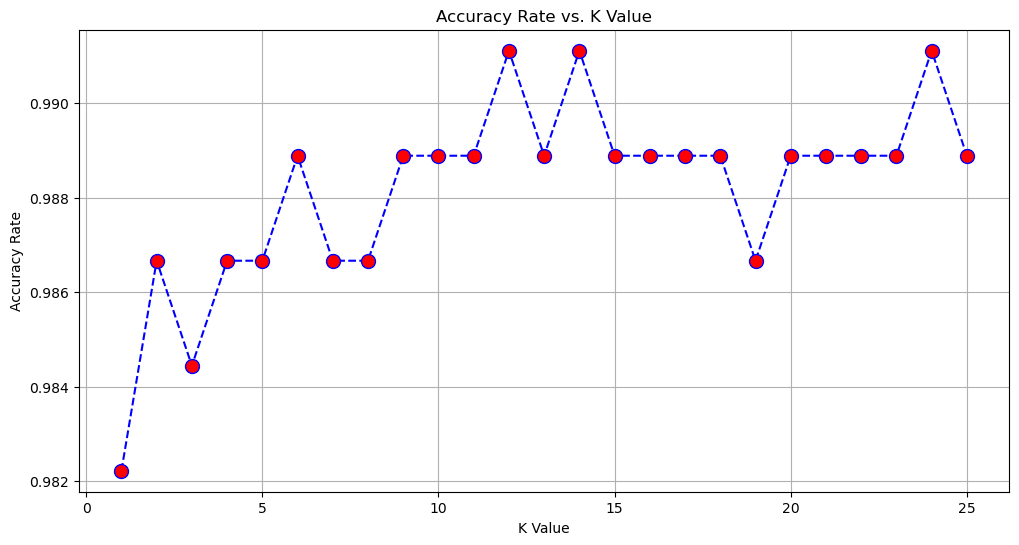

In [21]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fake_bills.csv', sep=';')

# Prepare the dataset
X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values
y = df['is_genuine'].astype(int).values

# Handle missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Preprocess the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Set the range of k
k_range = range(1, 26)

# List to store the average accuracy for each value of k
accuracy_scores = []

# Loop over the range of k values
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy rate vs. k
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.grid()
plt.show()


#### Accuracy Rate vs. K Value:

- The plot shows a high accuracy rate across the range of k values, staying mostly above 98%.

- There is some fluctuation in accuracy as k increases, but there is no clear upward or downward trend, suggesting that the model is relatively robust to the choice of k in this range.

- The accuracy peaks at certain points, suggesting these k values might be capturing the balance between bias and variance effectively.

### Error Rate vs K Value

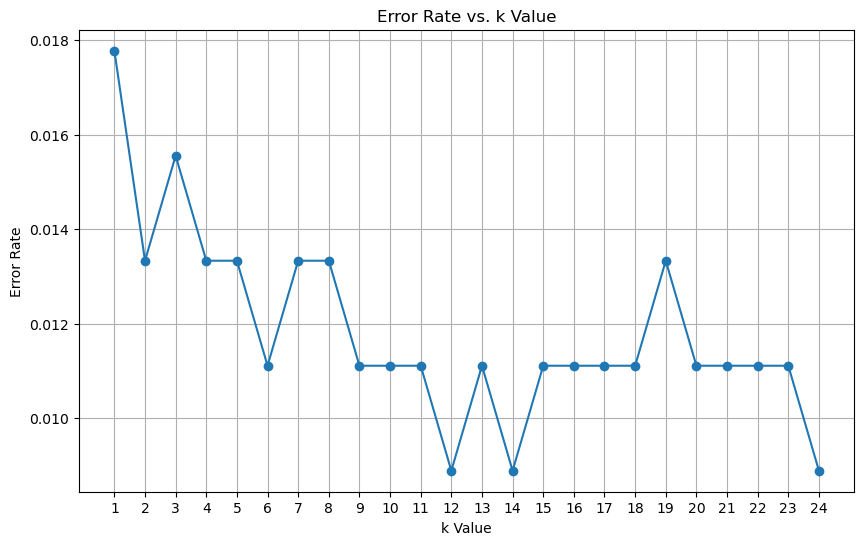

In [22]:
# Range of k to try
k_values = range(1, 25)
errors = []

# Try each value of k
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

# Plot the error rate vs k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()


#### Error Rate vs. K Value:

- The error rate is relatively low, suggesting a good model fit to the data.

- Similar to the accuracy rate, the error rate fluctuates as k changes, with certain k values achieving lower error rates.

- There's a notable increase in the error rate at k=18, which indicates that for this particular k, the model's generalization is worse compared to adjacent k values.

#### Combining Insights from Both Plots:

Both plots indicate that the model's performance is fairly stable across a range of k values, which is a positive sign that your model is not overly sensitive to the exact choice of k. We should look for k values that consistently show high accuracy and low error rates across both plots.

### Further Analysis with the Fake Bills Data:

The consistent high accuracy indicates that our features have a strong signal for distinguishing between genuine and fake bills. The lack of a clear "elbow" in the error rate plot means there isn't a single value of k that dramatically changes the model's performance, providing flexibility in our choice. We may choose a k value that is not the absolute lowest in error but provides a good balance between complexity (computation time) and accuracy.

### Choosing the Right Value for K:

Considering the noise in this data, I should choose a k that is not too small to avoid overfitting. For this dataset size, the choice of k seems less critical as long as it's within a reasonable range. Since the plots do not show a significant variance in error rates, cross-validation across a range of k values would be a helpful next step to confirm the optimal k. From the plot, **k values like 7, 13, and 22** appear to be reasonable choices as they correspond to local minima in the error rate.

## **Conclusion:**

The right k value for this dataset seems to be one that maintains low error while avoiding overfitting. Based on the provided plots and the nature of the dataset, I might opt for k values around 7 or 13, which show a good balance in performance. However, confirming this through cross-validation and considering the computational efficiency is advisable before finalizing the model.